In [34]:
#TO USE datadotworld PACKAGE:
#1. create account at data.world, then run the next two lines:
#2. in terminal/powershell: pip install datadotworld[pandas]
#
#   IF THIS DOESN'T WORK BC YOU GET AN ERROR ABOUT "CCHARDET", RUN:
#    conda install -c conda-forge cchardet
#   THEN RERUN: pip install datadotworld[pandas] 
#
#3. in terminal/powershell: dw configure          
#3a. copy in API token from data.world (get from settings > advanced)

import datadotworld as dw
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as pdr # IF NECESSARY, from terminal: pip install pandas_datareader 
import datetime

baby_names = dw.load_dataset('nkrishnaswami/us-ssa-baby-names-national')
baby_names = baby_names.dataframes['names_ranks_counts']
print(baby_names)

             name sex  year     rank  count
0            John   M  1880      1.0   9655
1            Mary   F  1880      1.0   7065
2            John   M  1881      1.0   8769
3            Mary   F  1881      1.0   6919
4            John   M  1882      1.0   9557
5            Mary   F  1882      1.0   8148
6            John   M  1883      1.0   8894
7            Mary   F  1883      1.0   8012
8            John   M  1884      1.0   9388
9            Mary   F  1884      1.0   9217
10           John   M  1885      1.0   8756
11           Mary   F  1885      1.0   9128
12           John   M  1886      1.0   9026
13           Mary   F  1886      1.0   9889
14           John   M  1887      1.0   8110
15           Mary   F  1887      1.0   9888
16           John   M  1888      1.0   9247
17           Mary   F  1888      1.0  11754
18           John   M  1889      1.0   8548
19           Mary   F  1889      1.0  11648
20           John   M  1890      1.0   8502
21           Mary   F  1890     

In [6]:
baby_names.loc[baby_names['name'] == "John"]

,name,sex,year,rank,count
0,John,M,1880,1.0,9655
2,John,M,1881,1.0,8769
4,John,M,1882,1.0,9557
6,John,M,1883,1.0,8894
8,John,M,1884,1.0,9388
10,John,M,1885,1.0,8756
12,John,M,1886,1.0,9026
14,John,M,1887,1.0,8110
16,John,M,1888,1.0,9247
18,John,M,1889,1.0,8548


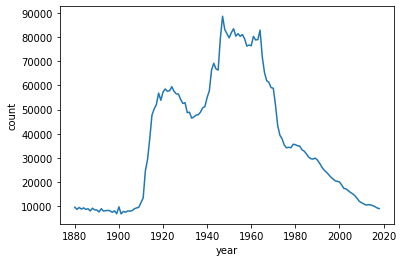

In [10]:
somenames = baby_names.loc[baby_names['name'] == "John"]
combined = somenames.groupby('year')['count'].sum().reset_index()
sns.lineplot(data=combined,x='year',y='count')

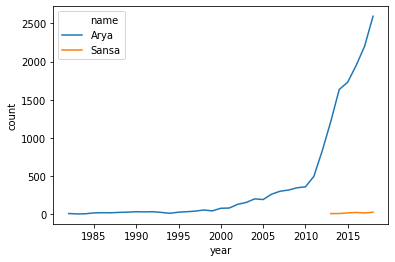

In [15]:
mynames = (baby_names['name'] == "Sansa") | (baby_names['name'] == "Arya")
somenames = baby_names.loc[mynames]
combined = somenames.groupby(['name','year'])['count'].sum().reset_index()
sns.lineplot(data=combined,x='year',y='count',hue = 'name')

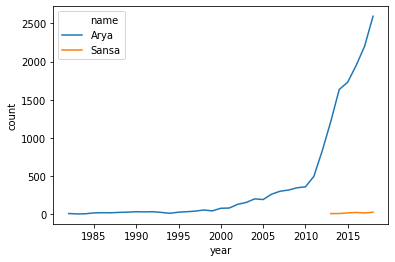

In [21]:
(
baby_names
    .query("name in ['Arya','Sansa']")
    .groupby(['name','year'])
    ['count'].sum()
    .reset_index()
    .pipe(
        (sns.lineplot, 'data'), hue='name',x='year',y='count'
    )
)

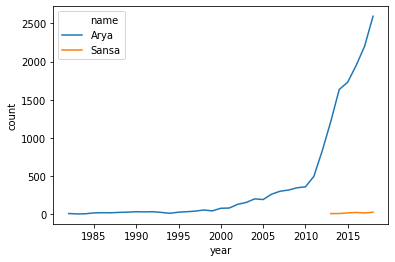

In [19]:

somenames = baby_names.query("name in ['Arya','Sansa']")
combined = somenames.groupby(['name','year'])['count'].sum().reset_index()
sns.lineplot(data=combined,x='year',y='count',hue ='name')


#Q4


In [44]:


start = datetime.datetime(1960, 1, 1) # you can specify start and end dates this way
end = datetime.datetime(2018, 1, 27)
macro_df = pdr.data.DataReader(['GDPCA'], 'fred', start, end)
macro_df.pct_change().mean()



GDPCA    0.030719
dtype: float64

In [ ]:
start = datetime.datetime(1960, 1, 1) # you can specify start and end dates this way
end = datetime.datetime(2018, 1, 27)
macro_df = pdr.data.DataReader(['GDPCA'], 'fred', start, end)
macro_df.pct_change().mean()